In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

In [2]:
df=pd.read_csv("moviesmod.csv",low_memory=False)

In [10]:
df

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,name_director,tokenized_sents
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,...,['English'],Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,John Lasseter,"[Toy, Story]"
1,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,...,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035,Larry J. Franco,[Jumanji]
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,...,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000,Howard Deutch,"[Grumpier, Old, Men]"
3,NaN,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,...,['English'],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760,Forest Whitaker,"[Waiting, to, Exhale]"
4,Father of the Bride Collection,0.0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1995-02-10,...,['English'],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,0.000000,Alan Silvestri,"[Father, of, the, Bride, Part, II]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45371,NaN,0.0,"['Drama', 'Action', 'Romance']",30840,en,"Yet another version of the classic epic, with ...",5.683753,"['Westdeutscher Rundfunk (WDR)', 'Working Titl...","['Canada', 'Germany', 'United Kingdom', 'Unite...",1991-05-13,...,['English'],Released,NaN,Robin Hood,5.7,26.0,1991,0.000000,NaN,"[Robin, Hood]"
45372,NaN,0.0,['Drama'],111109,tl,An artist struggles to finish his work while a...,0.178241,['Sine Olivia'],['Philippines'],2011-11-17,...,[''],Released,NaN,Century of Birthing,9.0,3.0,2011,0.000000,Colin Webb,"[Century, of, Birthing]"
45373,NaN,0.0,"['Action', 'Drama', 'Thriller']",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,['American World Pictures'],['United States of America'],2003-08-01,...,['English'],Released,A deadly game of wits.,Betrayal,3.8,6.0,2003,0.000000,Philippe Mora,[Betrayal]
45374,NaN,0.0,[''],227506,en,"In a small town live two brothers, one a minis...",0.003503,['Yermoliev'],['Russia'],1917-10-21,...,[''],Released,NaN,Satan Triumphant,0.0,0.0,1917,0.000000,Christopher Leitch,"[Satan, Triumphant]"


In [22]:
df.drop(columns="tokenized_sents",inplace=True)

In [30]:
df_num= df.select_dtypes(include = (int,float))
df_num

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
0,30000000.0,862,21.946943,373554033.0,81.0,7.7,5415.0,1995,12.451801
1,65000000.0,8844,17.015539,262797249.0,104.0,6.9,2413.0,1995,4.043035
2,0.0,15602,11.712900,0.0,101.0,6.5,92.0,1995,0.000000
3,16000000.0,31357,3.859495,81452156.0,127.0,6.1,34.0,1995,5.090760
4,0.0,11862,8.387519,76578911.0,106.0,5.7,173.0,1995,0.000000
...,...,...,...,...,...,...,...,...,...
45371,0.0,30840,5.683753,0.0,104.0,5.7,26.0,1991,0.000000
45372,0.0,111109,0.178241,0.0,360.0,9.0,3.0,2011,0.000000
45373,0.0,67758,0.903007,0.0,90.0,3.8,6.0,2003,0.000000
45374,0.0,227506,0.003503,0.0,87.0,0.0,0.0,1917,0.000000


In [ ]:
plt.figure(figsize=(15,7))
# df.corr() creates a correlation matrix 
corr_matrix = df.corr()# helps in creating a 0's matrix of df.corr() shape
mask = np.zeros_like(corr_matrix)# Returns copy of array with lower part of the triangle
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr_matrix, mask=mask, square=True)

<Axes: >

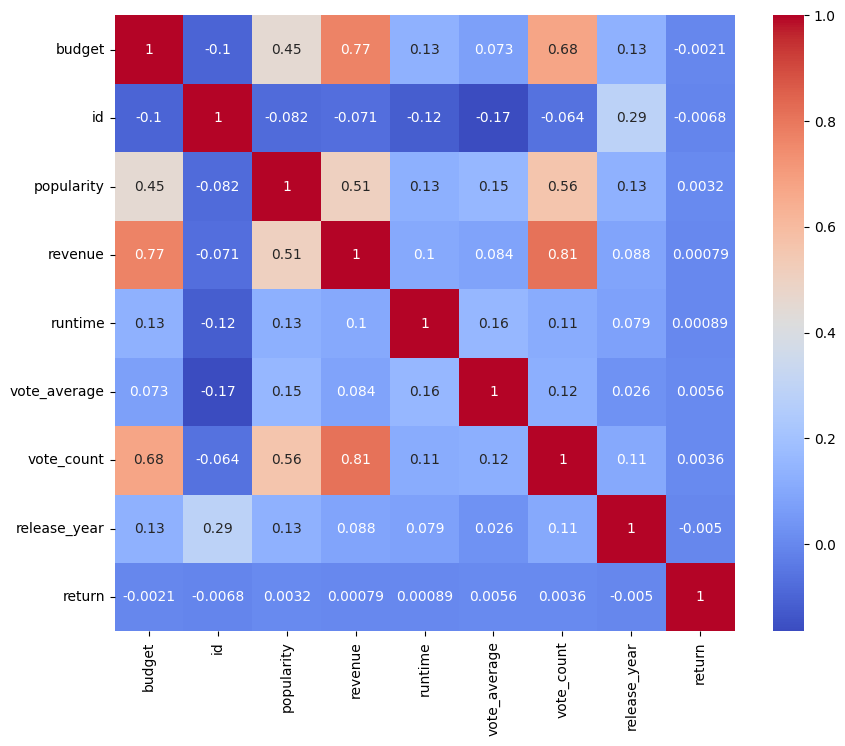

In [31]:
corr_matrix = df_num.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: ylabel='popularity'>

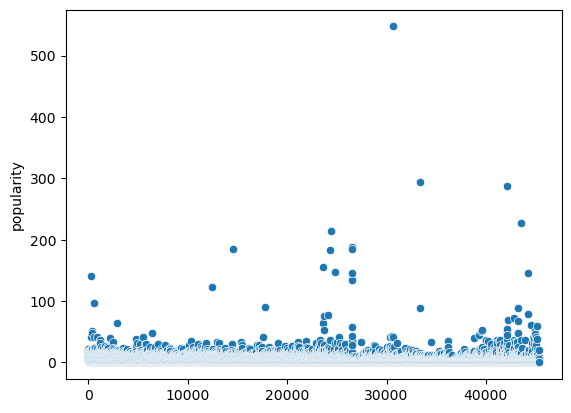

In [8]:
sns.scatterplot(df['popularity'])

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MK\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
df2 =  df.apply(lambda row: nltk.word_tokenize(row["title"]), axis=1)

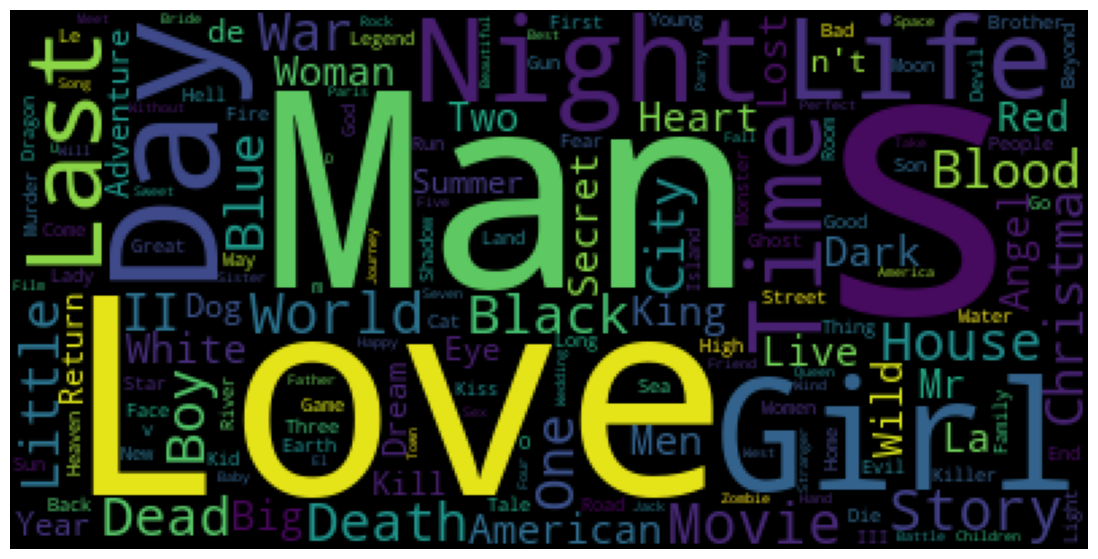

In [21]:
text = WordCloud().generate(df2.to_string())
plt.figure(figsize=(16, 7))
plt.imshow(text)
plt.axis("off")
plt.show()

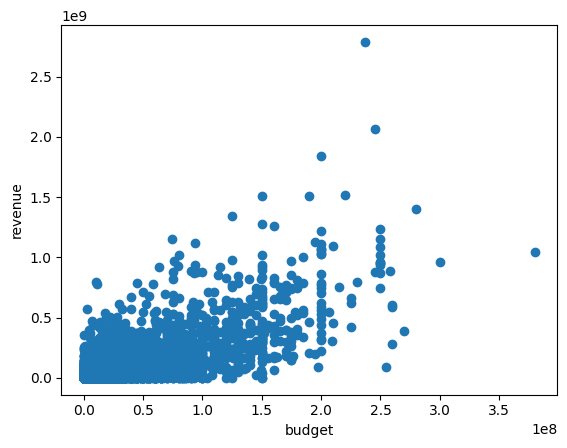

In [33]:
x = df['budget']
y = df['revenue']
plt.xlabel('budget')
plt.ylabel('revenue')
plt.scatter(x,y)
plt.show()

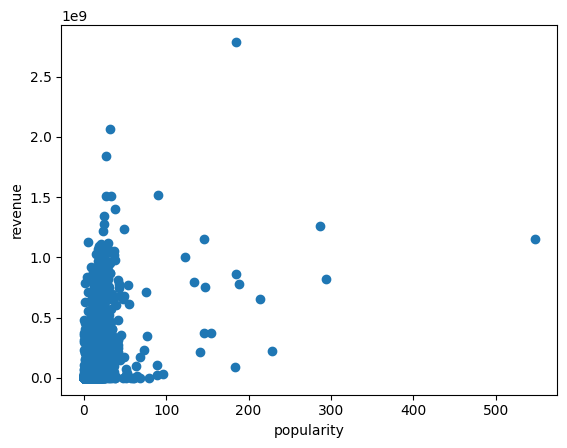

In [34]:
x = df['popularity']
y = df['revenue']
plt.xlabel('popularity')
plt.ylabel('revenue')
plt.scatter(x,y)
plt.show()

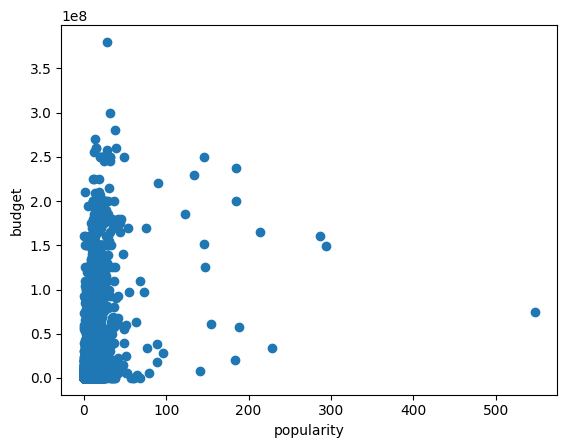

In [35]:
x = df['popularity']
y = df['budget']
plt.xlabel('popularity')
plt.ylabel('budget')
plt.scatter(x,y)
plt.show()